In [45]:
import pandas as pd
import plotly.express as px
pip install bokeh


SyntaxError: invalid syntax (3782342756.py, line 3)

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.transform import dodge, linear_cmap
from bokeh.palettes import RdBu
output_notebook()


In [ ]:
df = pd.read_csv("bls_data.csv")

df.head()

,Sex,Marital Status,Race,Native Country,Industry,Occupation,Education Enrollment,FT/PT Enrollment,Education Level Attained,Household Member Status,Weekly Earnings,Weekly Earnings Categories,PWSSWGT
0,Male,Married - spouse present,White only,United States,State government,Construction and extraction occupations,Not enrolled,NaN,"Some college, no degree",Adult civilian household member,1500.0,1500-1999,3131.1945
1,Female,Never married,White only,United States,State government,Management occupations,NaN,NaN,Bachelor's degree,Adult civilian household member,866.0,750-999,3414.4259
2,Female,Married - spouse present,Asian only,NaN,State government,Production occupations,NaN,NaN,High school graduate,Adult civilian household member,800.0,750-999,3356.7695
3,Female,Married - spouse present,White only,United States,Local government,Education instruction and library occupations,Not enrolled,NaN,Master's degree,Adult civilian household member,866.0,750-999,4638.1003
4,Male,Married - spouse present,White only,United States,State government,Sales and related occupations,Not enrolled,NaN,High school graduate,Adult civilian household member,1480.0,1250-1499,2885.3200


In [ ]:
# Strip whiteapace from column names
df.columns = df.columns.str.strip()

# Replace empty strings with NaNs uniformly
df.replace('', pd.NA, inplace=True)

# Check for missing data
df.isnull().sum()

# Check for duplicates rows
df.duplicated().sum()


df.head()

,Sex,Marital Status,Race,Native Country,Industry,Occupation,Education Enrollment,FT/PT Enrollment,Education Level Attained,Household Member Status,Weekly Earnings,Weekly Earnings Categories,PWSSWGT
0,Male,Married - spouse present,White only,United States,State government,Construction and extraction occupations,Not enrolled,NaN,"Some college, no degree",Adult civilian household member,1500.0,1500-1999,3131.1945
1,Female,Never married,White only,United States,State government,Management occupations,NaN,NaN,Bachelor's degree,Adult civilian household member,866.0,750-999,3414.4259
2,Female,Married - spouse present,Asian only,NaN,State government,Production occupations,NaN,NaN,High school graduate,Adult civilian household member,800.0,750-999,3356.7695
3,Female,Married - spouse present,White only,United States,Local government,Education instruction and library occupations,Not enrolled,NaN,Master's degree,Adult civilian household member,866.0,750-999,4638.1003
4,Male,Married - spouse present,White only,United States,State government,Sales and related occupations,Not enrolled,NaN,High school graduate,Adult civilian household member,1480.0,1250-1499,2885.3200


In [ ]:

# Convert earnings to numeric
df['Weekly Earnings'] = pd.to_numeric(df['Weekly Earnings'], errors='coerce')

# Display the first few rows
df.head()


,Sex,Marital Status,Race,Native Country,Industry,Occupation,Education Enrollment,FT/PT Enrollment,Education Level Attained,Household Member Status,Weekly Earnings,Weekly Earnings Categories,PWSSWGT
0,Male,Married - spouse present,White only,United States,State government,Construction and extraction occupations,Not enrolled,NaN,"Some college, no degree",Adult civilian household member,1500.0,1500-1999,3131.1945
1,Female,Never married,White only,United States,State government,Management occupations,NaN,NaN,Bachelor's degree,Adult civilian household member,866.0,750-999,3414.4259
2,Female,Married - spouse present,Asian only,NaN,State government,Production occupations,NaN,NaN,High school graduate,Adult civilian household member,800.0,750-999,3356.7695
3,Female,Married - spouse present,White only,United States,Local government,Education instruction and library occupations,Not enrolled,NaN,Master's degree,Adult civilian household member,866.0,750-999,4638.1003
4,Male,Married - spouse present,White only,United States,State government,Sales and related occupations,Not enrolled,NaN,High school graduate,Adult civilian household member,1480.0,1250-1499,2885.3200


In [ ]:
# # Average Weekly Earnings by Gender
# # df.groupby('Sex')['Weekly Earnings'].mean().sort_values(ascending=False)

# # df.head()

# weighted_salary = (df['Weekly Earnings'] * df['PWSSWGT']).sum() / df['PWSSWGT'].sum()
# # Calculate 
# #Loop through every row

# weighted_salary

# Filter for women
women_df = df[df['Sex'].str.lower() == 'female']

# Weighted average for women
weighted_salary_women = (women_df['Weekly Earnings'] * women_df['PWSSWGT']).sum() / women_df['PWSSWGT'].sum()

# Filter for men
men_df = df[df['Sex'].str.lower() == 'male']

# Weighted average for men
weighted_salary_men = (men_df['Weekly Earnings'] * men_df['PWSSWGT']).sum() / men_df['PWSSWGT'].sum()

# Overall weighted salary
weighted_salary_all = (df['Weekly Earnings'] * df['PWSSWGT']).sum() / df['PWSSWGT'].sum()

# Display
print(f"Weighted Avg Weekly Salary (Women): ${weighted_salary_women:.2f}")
print(f"Weighted Avg Weekly Salary (Men): ${weighted_salary_men:.2f}")
print(f"Weighted Avg Weekly Salary (All): ${weighted_salary_all:.2f}")




Weighted Avg Weekly Salary (Women): $1212.62
Weighted Avg Weekly Salary (Men): $1611.89
Weighted Avg Weekly Salary (All): $1417.54


In [ ]:
# Difference: men - women
gender_pay_gap = weighted_salary_men - weighted_salary_women

# Display it nicely
print(f"Men earn ${gender_pay_gap:.2f} more than women per week on average (weighted).")


Men earn $399.28 more than women per week on average (weighted).


In [ ]:
percent_gap = (gender_pay_gap / weighted_salary_women) * 100

print(f"That's a {percent_gap:.2f}% pay gap in favor of men.")


That's a 32.93% pay gap in favor of men.


In [ ]:
# Group by gender
gender_stats = df.groupby('Sex')['Weekly Earnings'].agg(['mean', 'median', lambda x: x.mode().iloc[0]])
gender_stats.columns = ['Mean', 'Median', 'Mode']
gender_stats


,Mean,Median,Mode
Sex,,,
Female,1224.401202,924.0,1000.00
Male,1653.080718,1192.0,8115.06


In [ ]:
# Average weekly earnings by education level
df.groupby('Education Enrollment')['Weekly Earnings'].mean().sort_values(ascending=False)

df

,Sex,Marital Status,Race,Native Country,Industry,Occupation,Education Enrollment,FT/PT Enrollment,Education Level Attained,Household Member Status,Weekly Earnings,Weekly Earnings Categories,PWSSWGT
0,Male,Married - spouse present,White only,United States,State government,Construction and extraction occupations,Not enrolled,NaN,"Some college, no degree",Adult civilian household member,1500.0,1500-1999,3131.1945
1,Female,Never married,White only,United States,State government,Management occupations,NaN,NaN,Bachelor's degree,Adult civilian household member,866.0,750-999,3414.4259
2,Female,Married - spouse present,Asian only,NaN,State government,Production occupations,NaN,NaN,High school graduate,Adult civilian household member,800.0,750-999,3356.7695
3,Female,Married - spouse present,White only,United States,Local government,Education instruction and library occupations,Not enrolled,NaN,Master's degree,Adult civilian household member,866.0,750-999,4638.1003
4,Male,Married - spouse present,White only,United States,State government,Sales and related occupations,Not enrolled,NaN,High school graduate,Adult civilian household member,1480.0,1250-1499,2885.3200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10278,Female,Married - spouse present,White only,United States,State government,Office and administrative support occupations,NaN,NaN,Associate degree - academic,Adult civilian household member,1630.0,1500-1999,1550.0935
10279,Male,Married - spouse present,White only,United States,State government,Production occupations,Not enrolled,NaN,High school graduate,Adult civilian household member,720.0,500-749,3738.4843
10280,Female,Never married,White only,NaN,State government,Sales and related occupations,NaN,NaN,"Some college, no degree",Adult civilian household member,462.0,250-499,2265.9486
10281,Female,Divorced,White only,United States,Private nonprofit,Production occupations,Not enrolled,NaN,Associate degree - academic,Adult civilian household member,950.0,750-999,3958.7897


In [ ]:
education_enroll_stats = df.groupby(['Sex', 'Education Enrollment'])['Weekly Earnings'].agg(['mean', 'median', lambda x: x.mode().iloc[0]])
education_enroll_stats.columns = ['Mean', 'Median', 'Mode']
education_enroll_stats


Mean  Median     Mode
Sex    Education Enrollment                              
Female Enrolled               572.863443   350.0   240.00
       Not enrolled          1303.208168  1000.0  1000.00
Male   Enrolled               589.996713   305.0   300.00
       Not enrolled          1682.836059  1200.0  8115.06

In [ ]:
# Average weekly earnings by occupation
df.groupby('Occupation')['Weekly Earnings'].mean().sort_values(ascending=False).head(10)

# avg wages by occupation for men and women and all with weights 

Occupation
Legal occupations                                             2725.540968
Computer and mathematical occupations                         2437.439493
Management occupations                                        2271.107722
Architecture and engineering occupations                      2254.300440
Life, physical, and social science occupations                2239.421342
Business and financial operations occupations                 1937.683128
Healthcare practitioner and technical occupations             1828.686996
Arts, design, entertainment, sports, and media occupations    1588.193179
Protective service occupations                                1556.398621
Community and social service occupations                      1448.900532
Name: Weekly Earnings, dtype: float64

In [ ]:
occupation_stats = df.groupby(['Sex', 'Occupation'])['Weekly Earnings'].agg(['mean', 'median', lambda x: x.mode().iloc[0]])
occupation_stats.columns = ['Mean', 'Median', 'Mode']
occupation_stats


Mean  \
Sex    Occupation                                                        
Female Architecture and engineering occupations            1901.575185   
       Arts, design, entertainment, sports, and media ...  1148.425000   
       Building and grounds cleaning and maintenance o...   569.773050   
       Business and financial operations occupations       1737.636000   
       Community and social service occupations            1290.804094   
       Computer and mathematical occupations               2170.077895   
       Construction and extraction occupations             1216.444444   
       Education instruction and library occupations       1209.098531   
       Farming, fishing, and forestry occupations           593.066667   
       Food preparation and serving related occupations     519.993548   
       Healthcare practitioner and technical occupations   1632.280636   
       Healthcare support occupations                       797.438619   
       Installation, maintenance, and repair occupations    870.000000   
       Legal occupations                                   2009.772308   
       Life, physical, and social science occupations      1936.950667   
       Management occupations                              1945.385839   
       Office and administrative support occupations       1003.008281   
       Personal care and service occupations                587.492063   
       Production occupations                               781.128205   
       Protective service occupations                      1223.321429   
       Sales and related occupations                        775.221278   
       Transportation and material moving occupations       705.545946   
Male   Architecture and engineering occupations            2341.273790   
       Arts, design, entertainment, sports, and media ...  1966.488387   
       Building and grounds cleaning and maintenance o...   806.450262   
       Business and financial operations occupations       2216.633307   
       Community and social service occupations            1778.052131   
       Computer and mathematical occupations               2555.576013   
       Construction and extraction occupations             1396.110427   
       Education instruction and library occupations       1714.251744   
       Farming, fishing, and forestry occupations           737.956522   
       Food preparation and serving related occupations     615.425000   
       Healthcare practitioner and technical occupations   2511.007792   
       Healthcare support occupations                       994.246415   
       Installation, maintenance, and repair occupations   1304.111462   
       Legal occupations                                   3939.235652   
       Life, physical, and social science occupations      2545.979459   
       Management occupations                              2553.091280   
       Office and administrative support occupations       1125.101368   
       Personal care and service occupations               1004.862778   
       Production occupations                              1211.385278   
       Protective service occupations                      1662.377727   
       Sales and related occupations                       1595.997783   
       Transportation and material moving occupations       980.384085   

                                                           Median     Mode  
Sex    Occupation                                                           
Female Architecture and engineering occupations            1840.0  2880.00  
       Arts, design, entertainment, sports, and media ...  1079.0  1250.00  
       Building and grounds cleaning and maintenance o...   510.0   600.00  
       Business and financial operations occupations       1380.0  1154.00  
       Community and social service occupations            1154.0  1250.00  
       Computer and mathematical occupations               1880.0  2880.00  
       Construction and extraction occupation

In [ ]:
import pandas as pd
import numpy as np

# Load your CSV file (adjust filename if needed)
# df = pd.read_csv("your_file.csv")

# If you're using pasted data as a string, use this instead:
# from io import StringIO
# df = pd.read_csv(StringIO(your_data_string))

# Clean column names
df.columns = df.columns.str.strip()

# Helper functions
def weighted_mean(x):
    return (x['Weekly Earnings'] * x['PWSSWGT']).sum() / x['PWSSWGT'].sum()

def weighted_median(data, weights):
    sorted_data, sorted_weights = zip(*sorted(zip(data, weights)))
    cum_weights = np.cumsum(sorted_weights)
    cutoff = sum(sorted_weights) / 2
    return sorted_data[np.searchsorted(cum_weights, cutoff)]

def weighted_mode(x, weights):
    df_temp = pd.DataFrame({'value': x, 'weight': weights})
    return df_temp.groupby('value')['weight'].sum().idxmax()

# Group by Sex, Occupation, and Education Enrollment
group = ['Sex', 'Occupation', 'Education Enrollment']
weighted_stats = df.groupby(group).apply(
    lambda g: pd.Series({
        'Weighted Mean': weighted_mean(g),
        'Weighted Median': weighted_median(g['Weekly Earnings'], g['PWSSWGT']),
        'Weighted Mode': weighted_mode(g['Weekly Earnings'], g['PWSSWGT'])
    })
).reset_index()

# Display results
weighted_stats


/var/folders/fk/b6qsr5kn60l42qzvvj2hdyjm0000gn/T/ipykernel_20956/885272739.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_stats = df.groupby(group).apply(


,Sex,Occupation,Education Enrollment,Weighted Mean,Weighted Median,Weighted Mode
0,Female,Architecture and engineering occupations,Enrolled,1888.035158,2420.0,2420.00
1,Female,Architecture and engineering occupations,Not enrolled,1920.180443,1730.0,1880.00
2,Female,"Arts, design, entertainment, sports, and media...",Enrolled,454.753594,340.0,420.00
3,Female,"Arts, design, entertainment, sports, and media...",Not enrolled,1293.364996,1250.0,1250.00
4,Female,Building and grounds cleaning and maintenance ...,Enrolled,139.442122,150.0,150.00
...,...,...,...,...,...,...
83,Male,Protective service occupations,Not enrolled,1851.739557,1300.0,8115.06
84,Male,Sales and related occupations,Enrolled,644.007590,278.0,140.00
85,Male,Sales and related occupations,Not enrolled,1655.924588,1154.0,8115.06
86,Male,Transportation and material moving occupations,Enrolled,334.259729,210.0,156.00


In [ ]:
# Group by Occupation only
group = ['Occupation']

occupation_stats = df.groupby(group).apply(
    lambda g: pd.Series({
        'Weighted Mean': weighted_mean(g),
        'Weighted Median': weighted_median(g['Weekly Earnings'], g['PWSSWGT']),
        'Weighted Mode': weighted_mode(g['Weekly Earnings'], g['PWSSWGT'])
    })
).reset_index()

# Show result
occupation_stats


/var/folders/fk/b6qsr5kn60l42qzvvj2hdyjm0000gn/T/ipykernel_20956/2010112593.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  occupation_stats = df.groupby(group).apply(


,Occupation,Weighted Mean,Weighted Median,Weighted Mode
0,Architecture and engineering occupations,2176.421425,1850.0,8115.06
1,"Arts, design, entertainment, sports, and media...",1483.192721,1154.0,1250.00
2,Building and grounds cleaning and maintenance ...,718.882576,684.0,600.00
3,Business and financial operations occupations,1973.689652,1540.0,8115.06
4,Community and social service occupations,1452.366848,1200.0,1250.00
5,Computer and mathematical occupations,2453.759994,2100.0,8115.06
6,Construction and extraction occupations,1301.812302,1008.0,1000.00
7,Education instruction and library occupations,1300.602448,1102.0,1154.00
8,"Farming, fishing, and forestry occupations",641.678237,674.0,300.00
9,Food preparation and serving related occupations,569.971363,500.0,600.00


In [ ]:
print(df['Sex'].unique())


['Male' 'Female']


In [ ]:
# Comparison between male vs. femoal earnings within same job title
# gender_pay_gap = df.pivot_table(
#     values='Weekly Earnings',
#     index='Occupation',
#     columns='Sex',
#     aggfunc='mean'
# ).dropna()

# # Calculate difference
# gender_pay_gap['Gap'] = gender_pay_gap['Male'] - gender_pay_gap['Female']
# gender_pay_gap.sort_values('Gap')


In [ ]:
# Helper for weighted mean
def weighted_mean(x):
    return (x['Weekly Earnings'] * x['PWSSWGT']).sum() / x['PWSSWGT'].sum()

# Step 1: Group by Occupation and Sex, compute weighted means
weighted_means = df.groupby(['Occupation', 'Sex']).apply(weighted_mean).unstack()

# Step 2: Rename columns just in case they are lowercase
weighted_means.columns.name = None
weighted_means = weighted_means.rename(columns=lambda x: x.capitalize())

# Step 3: Calculate the gender pay gap (Male - Female)
weighted_means['Gap'] = weighted_means['Female'] - weighted_means['Male']

# Step 4: Sort by gap
gender_pay_gap = weighted_means.sort_values('Gap')

# Show result
gender_pay_gap


/var/folders/fk/b6qsr5kn60l42qzvvj2hdyjm0000gn/T/ipykernel_20956/1166386276.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_means = df.groupby(['Occupation', 'Sex']).apply(weighted_mean).unstack()


,Female,Male,Gap
Occupation,,,
Legal occupations,1978.964720,3798.519983,-1819.555263
Sales and related occupations,791.548588,1566.323318,-774.774731
Healthcare practitioner and technical occupations,1617.086324,2389.459848,-772.373524
Management occupations,1943.588043,2537.601019,-594.012976
"Arts, design, entertainment, sports, and media occupations",1188.696418,1698.157227,-509.460808
Business and financial operations occupations,1775.311471,2254.909834,-479.598363
Computer and mathematical occupations,2131.319163,2593.296482,-461.977320
Education instruction and library occupations,1195.763741,1641.447332,-445.683591
Community and social service occupations,1316.590233,1753.282368,-436.692134


/var/folders/fk/b6qsr5kn60l42qzvvj2hdyjm0000gn/T/ipykernel_20956/3323134889.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Education Level Attained')['Weekly Earnings'].mean().plot(kind='bar', figsize=(12, 6), title='Weekly Earnings by Education Level')


<Axes: title={'center': 'Weekly Earnings by Education Level'}, xlabel='Education Level Attained'>

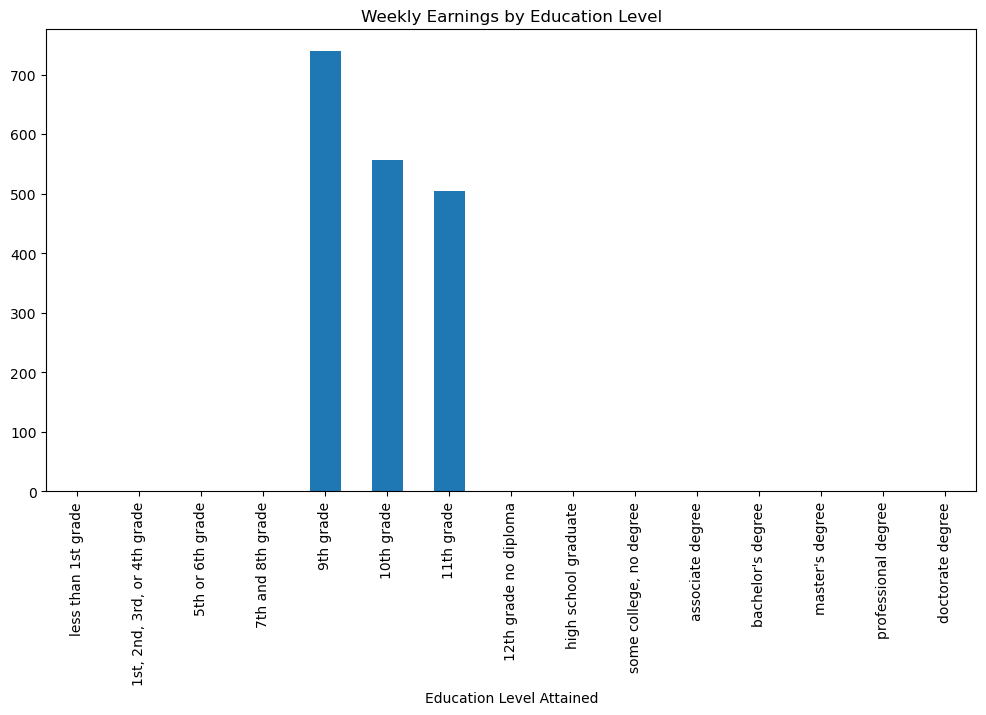

In [ ]:
# Optional: Create an ordered category for education levels
education_order = [
    "less than 1st grade", "1st, 2nd, 3rd, or 4th grade", "5th or 6th grade",
    "7th and 8th grade", "9th grade", "10th grade", "11th grade", "12th grade no diploma",
    "high school graduate", "some college, no degree", "associate degree",
    "bachelor's degree", "master's degree", "professional degree", "doctorate degree"
]

df['Education Level Attained'] = pd.Categorical(df['Education Level Attained'], categories=education_order, ordered=True)

# Plot average earnings by education level
df.groupby('Education Level Attained')['Weekly Earnings'].mean().plot(kind='bar', figsize=(12, 6), title='Weekly Earnings by Education Level')


In [ ]:

fig1 = px.bar(
    gender_pay_gap.reset_index(),
    x='Gap',
    y='Occupation',
    orientation='h',
    color='Gap',
    color_continuous_scale='RdBu',
    title='Gender Pay Gap by Occupation (Male - Female)',
    labels={'Gap': 'Pay Gap ($)'}
)

fig1.update_layout(yaxis={'categoryorder': 'total ascending'})
fig1.show()


In [ ]:
df_compare = weighted_means[['Male', 'Female']].reset_index()

fig2 = px.bar(
    df_compare.melt(id_vars='Occupation', value_vars=['Male', 'Female'], var_name='Gender', value_name='Earnings'),
    x='Earnings',
    y='Occupation',
    color='Gender',
    barmode='group',
    title='Male vs. Female Weekly Earnings by Occupation (Weighted)'
)

fig2.update_layout(yaxis={'categoryorder': 'total ascending'})
fig2.show()


In [47]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

# Simple test plot
p = figure(title="Test Bokeh Plot")
p.line(x=[1, 2, 3], y=[4, 6, 2])
show(p)


Loading BokehJS ...

In [51]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.palettes import RdBu
from bokeh.transform import linear_cmap

output_notebook()

# Prepare data
gender_pay_gap = gender_pay_gap.reset_index()
source = ColumnDataSource(gender_pay_gap)

# Color mapping
mapper = linear_cmap(
    field_name='Gap',
    palette=RdBu[11],
    low=gender_pay_gap['Gap'].min(),
    high=gender_pay_gap['Gap'].max()
)

# Updated: use 'height' and 'width' instead of 'plot_height' and 'plot_width'
p1 = figure(
    y_range=gender_pay_gap['Occupation'].tolist(),
    height=600,
    width=800,
    title="Gender Pay Gap by Occupation (Male - Female)",
    toolbar_location=None
)

p1.hbar(
    y='Occupation',
    right='Gap',
    height=0.6,
    source=source,
    color=mapper,
)

p1.add_tools(HoverTool(tooltips=[("Occupation", "@Occupation"), ("Pay Gap", "@Gap{$0.00}")]))

p1.y_range.range_padding = 0.1
p1.ygrid.grid_line_color = None
p1.xaxis.axis_label = "Pay Gap ($)"

show(p1)


Loading BokehJS ...